In [127]:
from requests.auth import HTTPBasicAuth
import requests
resp = requests.get('https://services.digitalglobe.com/earthservice/wmtsaccess?SERVICE=WMTS&VERSION=1.0.0&STYLE=&REQUEST=GetTile&CONNECTID=c19b1c96-cd25-453a-96ef-4cd223c6d2c0&LAYER=DigitalGlobe:ImageryTileService&FORMAT=image/jpeg&TileRow=18200&TileCol=27207&TileMatrixSet=EPSG:4326&TileMatrix=EPSG:4326:16&featureProfile=Consumer_Profile', auth=HTTPBasicAuth('roberteb', 'kl;JKL:7890&*()'))
data1 = resp.text
print data1

<html><head><title>Apache Tomcat/7.0.53 - Error report</title><style><!--H1 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:22px;} H2 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:16px;} H3 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:14px;} BODY {font-family:Tahoma,Arial,sans-serif;color:black;background-color:white;} B {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;} P {font-family:Tahoma,Arial,sans-serif;background:white;color:black;font-size:12px;}A {color : black;}A.name {color : black;}HR {color : #525D76;}--></style> </head><body><h1>HTTP Status 401 - </h1><HR size="1" noshade="noshade"><p><b>type</b> Status report</p><p><b>message</b> <u></u></p><p><b>description</b> <u>This request requires HTTP authentication.</u></p><HR size="1" noshade="noshade"><h3>Apache Tomcat/7.0.53</h3></body></html>


In [118]:
import httplib
import urllib
import base64 

conn = httplib.HTTPSConnection("services.digitalglobe.com")
userAndPass = base64.encodestring('%s:%s' % ("roberteb", "kl;JKL:7890&*()")).replace('\n', '')
 
print userAndPass
headers = { 'Authorization' : 'Basic %s' %  userAndPass }
params = urllib.urlencode({'USERNAME': 'roberteb', 'PASSWORD': 'jkl;JKL:7890&*()'})
conn.request("POST", "/earthservice/wmtsaccess?SERVICE=WMTS&VERSION=1.0.0&STYLE=&REQUEST=GetTile&CONNECTID=c19b1c96-cd25-453a-96ef-4cd223c6d2c0&LAYER=DigitalGlobe:ImageryTileService&FORMAT=image/jpeg&TileRow=18200&TileCol=27207&TileMatrixSet=EPSG:4326&TileMatrix=EPSG:4326:16&featureProfile=Consumer_Profile",params)
r1 = conn.getresponse()
print r1.status, r1.reason
data1 = r1.read()
print data1

cm9iZXJ0ZWI6a2w7SktMOjc4OTAmKigp
403 Forbidden
<html><head><title>Apache Tomcat/7.0.53 - Error report</title><style><!--H1 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:22px;} H2 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:16px;} H3 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:14px;} BODY {font-family:Tahoma,Arial,sans-serif;color:black;background-color:white;} B {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;} P {font-family:Tahoma,Arial,sans-serif;background:white;color:black;font-size:12px;}A {color : black;}A.name {color : black;}HR {color : #525D76;}--></style> </head><body><h1>HTTP Status 403 - Login failed - invalid connect id: Credentials[username=null, connectId=c19b1c96-cd25-453a-96ef-4cd223c6d2c0]</h1><HR size="1" noshade="noshade"><p><b>type</b> Status report</p><p><b>message</b> <u>Login failed - invalid connect id: Credentials[use

52864 68236


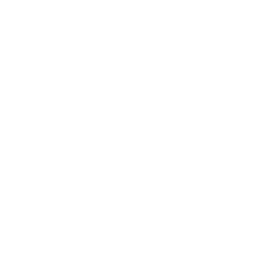

In [3]:
from owslib.wms import WebMapService
from PIL import Image
import io
import binascii
import pylab
import numpy as np
from PIL import ImageDraw
from IPython.display import display
import math

from owslib.wmts import WebMapTileService

#https://evwhs.digitalglobe.com/earthservice/wmtsaccess?connectid=c19b1c96-cd25-453a-96ef-4cd223c6d2c0
wmts = WebMapTileService("http://evwhs.digitalglobe.com/earthservice/wmtsaccess?connectid=c19b1c96-cd25-453a-96ef-4cd223c6d2c0", username='roberteb', password='jkl;JKL:7890&*()')

#print wmts.contents
zoom=17
lat_deg = -7.39683
lon_deg= -34.80467
lat_rad = math.radians(lat_deg)
n = 2.0 ** zoom
xtile = int((lon_deg + 180.0) / 360.0 * n)
ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
print xtile, ytile

#https://services.digitalglobe.com/earthservice/wmtsaccess?SERVICE=WMTS&VERSION=1.0.0&STYLE=&REQUEST=GetTile&CONNECTID=c19b1c96-cd25-453a-96ef-4cd223c6d2c0&username=roberteb&password=jkl%3BJKL%3A7890%26%2A%28%297890%26%2A%28%29&LAYER=DigitalGlobe:ImageryTileService&FORMAT=image/jpeg&TileRow=18200&TileCol=27207&TileMatrixSet=EPSG:4326&TileMatrix=EPSG:4326:16&featureProfile=Consumer_Profile

#xtile=3000
#ytile=3000
#zoom=16
#n = 2 ^ zoom
#lon_deg = xtile / n * 360.0 - 180.0
#lat_rad = arctan(sinh(π * (1 - 2 * ytile / n)))
#lat_deg = lat_rad * 180.0 / π
tile = wmts.gettile(layer='DigitalGlobe:ImageryTileService',tilematrixset='EPSG:4326', tilematrix='EPSG:4326:'+str(zoom), row=ytile, column=xtile, format="image/jpeg")
#GeoTIFF")
#print tile
#print tile.read()
#f = open("test.jpeg","wb")
#f.write(tile.read())
#f.close()
stream = io.BytesIO(tile.read())
img = Image.open(stream)
#print np.histogram(np.asarray(img))
display(img)


In [123]:
wms = WebMapService('http://evwhs.digitalglobe.com/mapservice/wmsaccess?connectid=c19b1c96-cd25-453a-96ef-4cd223c6d2c0', username='roberteb', password='jkl;JKL:7890&*()')

print wms.contents

wms['DigitalGlobe:Imagery'].styles

#https://services.digitalglobe.com/mapservice/wmsaccess?connectid=c19b1c96-cd25-453a-96ef-4cd223c6d2c0&username=roberteb&password=jkl%3BJKL%3A7890%26*%28%297890%26*%28%29&SERVICE=WMS&REQUEST=GetFeatureInfo&version=1.1.1&SRS=EPSG:4326&BBOX=-73.8854994266476,40.6341176876158,-73.8606463081034,40.6501752378911&WIDTH=1102&HEIGHT=712&QUERY_LAYERS=DigitalGlobe:ImageryFootprint&X=200&Y=150&LAYERS=DigitalGlobe:ImageryFootprint

OrderedDict([('DigitalGlobe:CrisisEvent', <owslib.wms.ContentMetadata instance at 0x10a17c680>), ('DigitalGlobe:CrisisEventFootprint', <owslib.wms.ContentMetadata instance at 0x10a17b680>), ('DigitalGlobe:FoundationGEOINT', <owslib.wms.ContentMetadata instance at 0x10a15fbd8>), ('DigitalGlobe:FoundationGEOINTMetadata', <owslib.wms.ContentMetadata instance at 0x10a15fef0>), ('DigitalGlobe:ImageInMosaicFootprint', <owslib.wms.ContentMetadata instance at 0x10a15f290>), ('DigitalGlobe:ImageStrip', <owslib.wms.ContentMetadata instance at 0x10a15fa28>), ('DigitalGlobe:ImageStripMetadata', <owslib.wms.ContentMetadata instance at 0x10a15f9e0>), ('DigitalGlobe:Imagery', <owslib.wms.ContentMetadata instance at 0x105732dd0>), ('DigitalGlobe:ImageryFootprint', <owslib.wms.ContentMetadata instance at 0x1057321b8>), ('DigitalGlobe:NGAOtherProducts', <owslib.wms.ContentMetadata instance at 0x105732878>), ('DigitalGlobe:NGAOtherProductsMetadata', <owslib.wms.ContentMetadata instance at 0x1057329e0>)])

{'raster': {'legend': 'https://evwhs.digitalglobe.com/mapservice/wmsaccess?request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=DigitalGlobe%3AImagery&connectid=c19b1c96-cd25-453a-96ef-4cd223c6d2c0',
  'title': 'Raster'}}

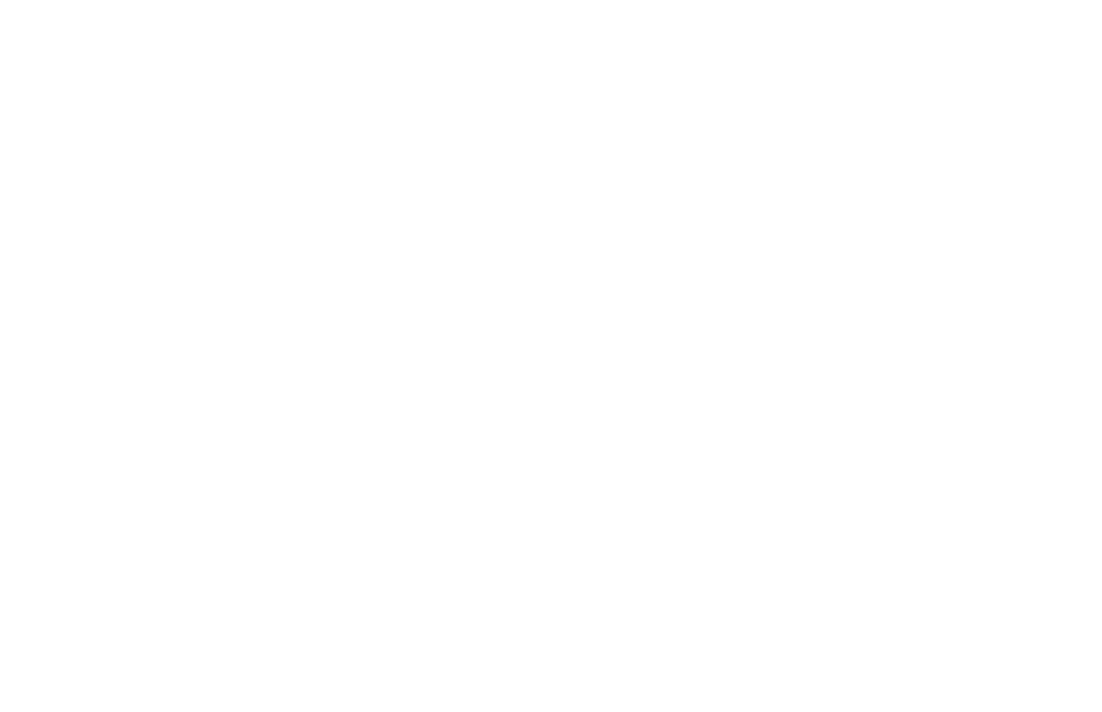

In [124]:
imgs = wms.getmap(   layers=['DigitalGlobe:Imagery'],
                     styles=['raster'],
                     srs='EPSG:4326',
                     bbox=(-7.39683, -34.80467, -7.39603, -34.80387),
                     format='image/jpeg',
                     size=(1102, 712))
                  #,
                  #   transparent=True
                   #  )
            # ,



#print imgs.read()
stream = io.BytesIO(imgs.read())
img = Image.open(stream)
display(img)


In [1]:
import math


zoom=17
lat_deg= -28.496109
lon_deg= -48.752528
lat_rad = math.radians(lat_deg)
n = 2.0 ** zoom

xtile = int((lon_deg + 180.0) / 360.0 * n)
ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
print xtile, ytile
resLat = 180 / n
resLon = 180 / n
print (xtile*resLon - 180,
            ytile*resLat - 90,
            (xtile+1)*resLon - 180,
            (ytile+1)*resLat - 90)
print 256* 56543.03392 * math.cos(lat_deg * math.pi / 180.0) / n

#print (lat_deg/170)*n,(lon_deg/360)*n




47785 76367
(-114.37728881835938, 14.874114990234375, -114.37591552734375, 14.87548828125)
97.0562850171


In [49]:
from pyproj import Proj, transform

#inProj = Proj(init='epsg:3857')
#outProj = Proj(init='epsg:4326')
#x1,y1 = -11705274.6374,4826473.6922
#x2,y2 = transform(inProj,outProj,x1,y1)
#print x2,y2

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')
    #proj='merc', ellps='sphere')

lat_deg=41.85
lon_deg-87.64999999999998
x2,y2 = transform(inProj,outProj,lat_deg,lon_deg)
n = 2.0 ** 3
print x2,y2
print (x2*n), (y2*n)
print (65.67111111111113*n), (95.17492654697409*n)
x3,y3 = transform(outProj,inProj,x2,y2)
print x3,y3

x4 = lon_deg * 20037508.34 / 180.0;
y4 = math.log(math.tan((90.0 + lat_deg) * math.pi / 360.0)) / (math.pi / 180.0);
y4 = y4 * 20037508.34 / 180.0;
print 'c',x4, y4;

lon = (x4 / 20037508.34) * 180;
lat = (y4 / 20037508.34) * 180;
lat = 180/math.pi * (2 * math.atan(math.exp(lat * math.pi / 180.0)) - math.pi / 2.0);
print lat,lon;

4658720.6897 -6232974.41865
37269765.5176 -49863795.3492
525.368888889 761.399412376
41.85 -48.752528
c -5427106.59109 5138536.58653
41.85 -48.752528
